You've constructed some potentially useful and business-relevant features, derived from summary statistics, for each of the states you're concerned with. You've explored many of these features in turn and found various trends. Some states are higher in some but not in others. Some features will also be more correlated with one another than others.<br>

One way to disentangle this interconnected web of relationships is via principal components analysis (PCA). This technique will find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain. You can use these derived features to visualize the data in a lower dimension (e.g. 2 down from 7) and know how much variance the representation explains. You can also explore how the original features contribute to these derived features.

The basic steps in this process are:
> * scale the data and verify the scaling
> * fit the PCA transformation (learn the transformation from the data)
> * Draw scree plot
> * Find the optimum number of components
> * Draw the biplot and interpret the relationship between features and components
> *Find the exact correlation between components and features using loading


In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [150]:
# load the data and get a basic idea 
original_data_df = pd.read_csv("ski_resort_data.csv")

In [151]:
original_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

In [152]:
original_data_df.describe(include='all')

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
count,330,330,330,330.000000,330.000000,330.000000,330.000000,164.000000,330.000000,330.000000,...,325.000000,327.000000,284.000000,279.000000,329.000000,316.000000,276.000000,279.000000,283.000000,187.000000
unique,329,38,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Crystal Mountain,New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,33,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4591.818182,1215.427273,3374.000000,0.172727,0.006098,0.184848,1.018182,...,1.433231,739.801223,174.873239,115.103943,63.656535,185.316456,57.916957,64.166810,120.053004,100.395722
std,NaN,NaN,NaN,3735.535934,947.864557,3117.121621,0.559946,0.078087,0.651685,2.198294,...,1.156171,1816.167441,261.336125,35.063251,109.429928,136.356842,26.140126,24.554584,31.045963,105.169620
min,NaN,NaN,NaN,315.000000,60.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.000000,2.000000,3.000000,6.000000,18.000000,15.000000,17.000000,30.000000,2.000000
25%,NaN,NaN,NaN,1403.750000,461.250000,869.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,85.000000,50.000000,97.000000,50.000000,69.000000,40.000000,47.000000,100.000000,40.000000
50%,NaN,NaN,NaN,3127.500000,964.500000,1561.500000,0.000000,0.000000,0.000000,0.000000,...,1.000000,200.000000,100.000000,114.000000,58.000000,150.000000,50.000000,60.000000,120.000000,72.000000
75%,NaN,NaN,NaN,7806.000000,1800.000000,6325.250000,0.000000,0.000000,0.000000,1.000000,...,2.000000,690.000000,200.500000,135.000000,69.000000,300.000000,71.000000,77.500000,139.500000,114.000000


In [153]:
print("Total missing vlaues",original_data_df.isna().sum().sum())
original_data_df.isna().sum()

Total missing vlaues 636


Name                   0
Region                 0
state                  0
summit_elev            0
vertical_drop          0
base_elev              0
trams                  0
fastEight            166
fastSixes              0
fastQuads              0
quad                   0
triple                 0
double                 0
surface                0
total_chairs           0
Runs                   4
TerrainParks          51
LongestRun_mi          5
SkiableTerrain_ac      3
Snow Making_ac        46
daysOpenLastYear      51
yearsOpen              1
averageSnowfall       14
AdultWeekday          54
AdultWeekend          51
projectedDaysOpen     47
NightSkiing_ac       143
dtype: int64

In [154]:
## scale the data and verify the scaling

In [155]:
# Get the three columns that are not numbers 
original_string_only = original_data_df[["Name", "state", "Region"]].copy()

# Drop the rows from the orignal data that are not numbers
original_numeric_only = original_data_df.copy().select_dtypes(include=[np.number])

print(f"String only columns:{original_string_only.columns.shape[0]}" + \
      f" Numeric Only Columns:{original_numeric_only.columns.shape[0]}" + \
      f" = {original_data_df.columns.shape[0]}")


String only columns:3 Numeric Only Columns:24 = 27


In [156]:
# Scale the data and verify the scaling
# Scaling is the standardization of the data to a curve that has 
# a mean of 0 and a standard deviation of 1

# scale the data 
scaled_data_df =\
    StandardScaler().fit(original_numeric_only.to_numpy())
original_numeric_data[:] = scaled_data_df.transform(original_numeric_only)

scaled_answer_dataframe = pd.concat([original_string_only, original_numeric_data], axis = 1)
scaled_answer_dataframe

/Users/charles/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


,Name,state,Region,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,-0.175024,1.357286,-1.003729,1.479658,-0.078326,-0.284078,0.447306,...,-0.375289,0.479874,-0.237175,0.997020,-0.033465,3.552815,0.271457,0.849969,0.966311,4.286516
1,Eaglecrest Ski Area,Alaska,Alaska,-0.534018,0.342945,-0.698497,-0.308940,-0.078326,-0.284078,-0.463873,...,0.490968,-0.055036,-0.440337,-2.002949,-0.179900,1.209655,-0.418391,-0.455592,-0.969731,NaN
2,Hilltop Ski Area,Alaska,Alaska,-0.670752,-0.973585,-0.507005,-0.308940,-0.078326,-0.284078,-0.463873,...,-0.375289,-0.391423,-0.555335,0.997020,-0.253118,-0.854383,-1.069913,-1.230769,1.030845,-0.671151
3,Arizona Snowbowl,Arizona,Arizona,1.852123,1.145965,1.871870,-0.308940,-0.078326,1.252736,-0.463873,...,0.490968,0.020513,-0.271674,0.197028,0.158731,0.548575,1.191253,1.013164,0.062824,NaN
4,Sunrise Park Resort,Arizona,Arizona,1.744881,0.617663,1.871870,-0.308940,NaN,-0.284078,-0.008283,...,-0.202038,0.033197,-0.363672,-0.002970,-0.134139,0.475122,0.616380,0.564377,-0.517988,-0.194452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming,1.315912,-0.227622,1.646963,-0.308940,NaN,-0.284078,-0.463873,...,0.057839,-0.242530,NaN,NaN,-0.500227,NaN,NaN,NaN,NaN,NaN
326,Sleeping Giant Ski Resort,Wyoming,Wyoming,0.760397,-0.428377,1.042605,-0.308940,-0.078326,-0.284078,-0.463873,...,-0.375289,-0.306499,-0.601333,-1.545811,0.158731,0.915842,-0.610015,-0.904379,-1.389207,NaN
327,Snow King Resort,Wyoming,Wyoming,0.862277,0.375700,0.919870,-0.308940,NaN,-0.284078,-0.463873,...,-0.375289,-0.187385,0.287979,0.168457,0.149578,0.842389,0.041507,-0.210800,0.095092,0.091567
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming,1.359613,-0.238188,1.742709,-0.308940,-0.078326,-0.284078,-0.463873,...,-0.635167,-0.366607,-0.555335,0.454168,-0.042617,0.475122,-0.341741,-0.618787,NaN,NaN


## fit the PCA transformation 

(learn the transformation from the data)


In [157]:
# I just found out that PCA cannot work with NaN in order to make 
# easy I am just goint to fill in the mean
original_numeric_data = original_numeric_data.fillna(\
    original_numeric_data.mean(axis=0))

print("Missing Values:", original_numeric_data.isna().sum().sum())


Missing Values: 0


In [158]:
# Return 16 features some may commbinations of the features
pca=PCA(n_components=16)
principalComponents=pca.fit_transform(original_numeric_data)


# Percentage of variance explained by each of the selected components
exp_var=pca.explained_variance_ratio_

# Return the cumulative sum of the elements along a given axis.
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

In [159]:
# The teacher gave us some print statements to explore
# Not the cumsum_var is the total from the exp_var added toegether
print(exp_var)
print('='*50)
print(cumsum_var)

[0.3725059  0.1110059  0.06246684 0.05109595 0.04794073 0.04332998
 0.04126312 0.03562211 0.03016106 0.02974415 0.02654768 0.02575941
 0.02349623 0.02091622 0.01864077 0.01413755]
[37.25 48.35 54.6  59.71 64.5  68.83 72.96 76.52 79.54 82.51 85.16 87.74
 90.09 92.18 94.04 95.45]


## Draw scree plot

In multivariate statistics, 

A scree plot is a line plot of the eigenvalues of factors or principal components in an analysis. 

The scree plot is used to determine the number of factors to retain 
in an exploratory factor analysis or 
principal components to keep in a principal component analysis. 

Text(0, 0.5, 'cumulation of the expect variance')

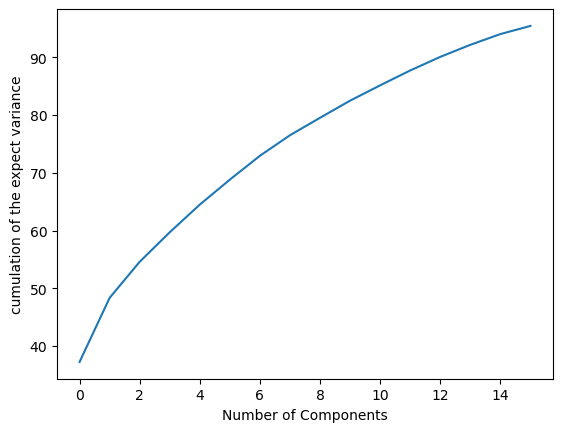

In [160]:
plt.plot(cumsum_var)
plt.xlabel("Number of Components")
plt.ylabel("cumulation of the expect variance")

## Find the optimum number of components

This is done by looking for graph, but I think calcuting the 
derivitive would be far more useful.

In [161]:
pd.DataFrame(principalComponents).head(12)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.122419,1.522808,-2.085559,0.564492,0.666916,-0.512131,-1.382202,1.327993,2.099811,0.286323,0.236441,-1.354923,-1.370716,-3.993687,0.576270,0.279917
1,-1.603816,1.117690,0.959672,0.138623,-1.418003,1.435840,-0.461822,1.140103,0.670844,-0.004751,0.730741,0.446340,-0.335288,-0.794625,0.280520,-0.271056
2,-2.319685,0.301798,-0.020027,-0.160294,1.024014,-1.185526,-0.907543,-1.450287,-0.000915,0.047558,0.674130,0.662424,-0.235913,0.125355,-0.401279,-0.130463
3,2.148764,1.622043,-0.298215,-0.611290,0.181972,-0.093281,1.015309,0.523768,-0.923980,-0.601080,-1.509114,0.686573,0.538626,0.273335,0.822426,-0.368359
4,1.037926,2.162739,-0.384236,-1.122938,-0.376303,-0.150502,1.462283,0.680608,-0.655950,-0.403081,-0.807362,0.200525,-0.058774,0.315675,-0.691618,0.252503
5,-1.112154,1.753064,1.115172,0.481050,-0.014785,-0.096289,0.544815,0.050693,0.192363,-0.893046,-0.626090,-0.174240,-0.086826,-0.036489,-0.474936,0.674714
6,1.705080,-0.993059,0.318717,1.512840,-0.031081,-0.875072,1.851014,0.068622,-0.460225,-1.114655,0.000402,-0.931552,4.736097,0.440414,0.382250,-0.029204
7,1.780809,1.541380,0.941051,1.315661,0.048555,-0.870179,-0.040785,-0.690656,0.127242,0.012041,-0.786460,1.057992,-0.503122,-0.289672,-0.240220,-0.027621
8,0.896307,1.125337,-0.471146,0.664888,0.708299,-1.765404,1.359610,-0.239661,0.525973,-0.874432,-0.193392,-0.472301,0.920745,-0.716132,-0.067957,0.354654
9,1.864591,0.657138,0.255873,1.766295,-0.601956,-0.119235,0.852634,0.486224,-0.695956,-0.387017,-0.217028,-0.185553,0.393531,0.425742,0.102929,-0.382470


In [ ]:
# Recalculate the PCA with the new number of components and make this 
# code reusable

pca=PCA(n_components=9)
principalComponents=pca.fit_transform(original_numeric_data)
exp_var=pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(exp_var)
print('='*75)
print(cumsum_var)

Text(0, 0.5, 'cumulation of the expect variance')

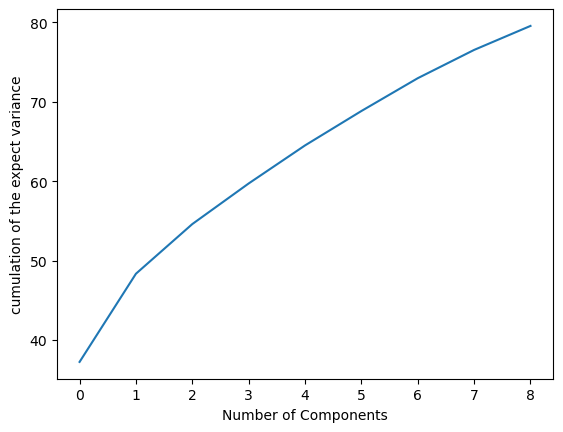

In [166]:
# Scree Plot 
plt.plot(cumsum_var)
plt.xlabel("Number of Components")
plt.ylabel("cumulation of the expect variance")

Text(0, 0.5, 'Explained of Variance')

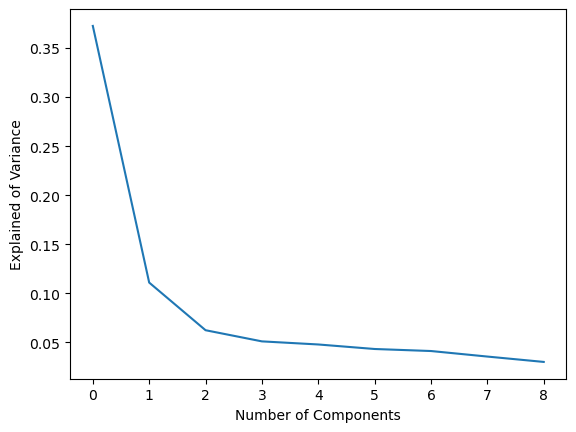

In [168]:
# Using a scree plot show the greatest variables for the components
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained of Variance')
#Text(0, 0.5, 'Explained of Variance')


## Draw the biplot 

and interpret the relationship between features and components

Biplots are a type of exploratory graph used in statistics, a generalization of the simple two-variable scatterplot. A biplot overlays a score plot with a loading plot. A biplot allows information on both samples and variables of a data matrix to be displayed graphically.

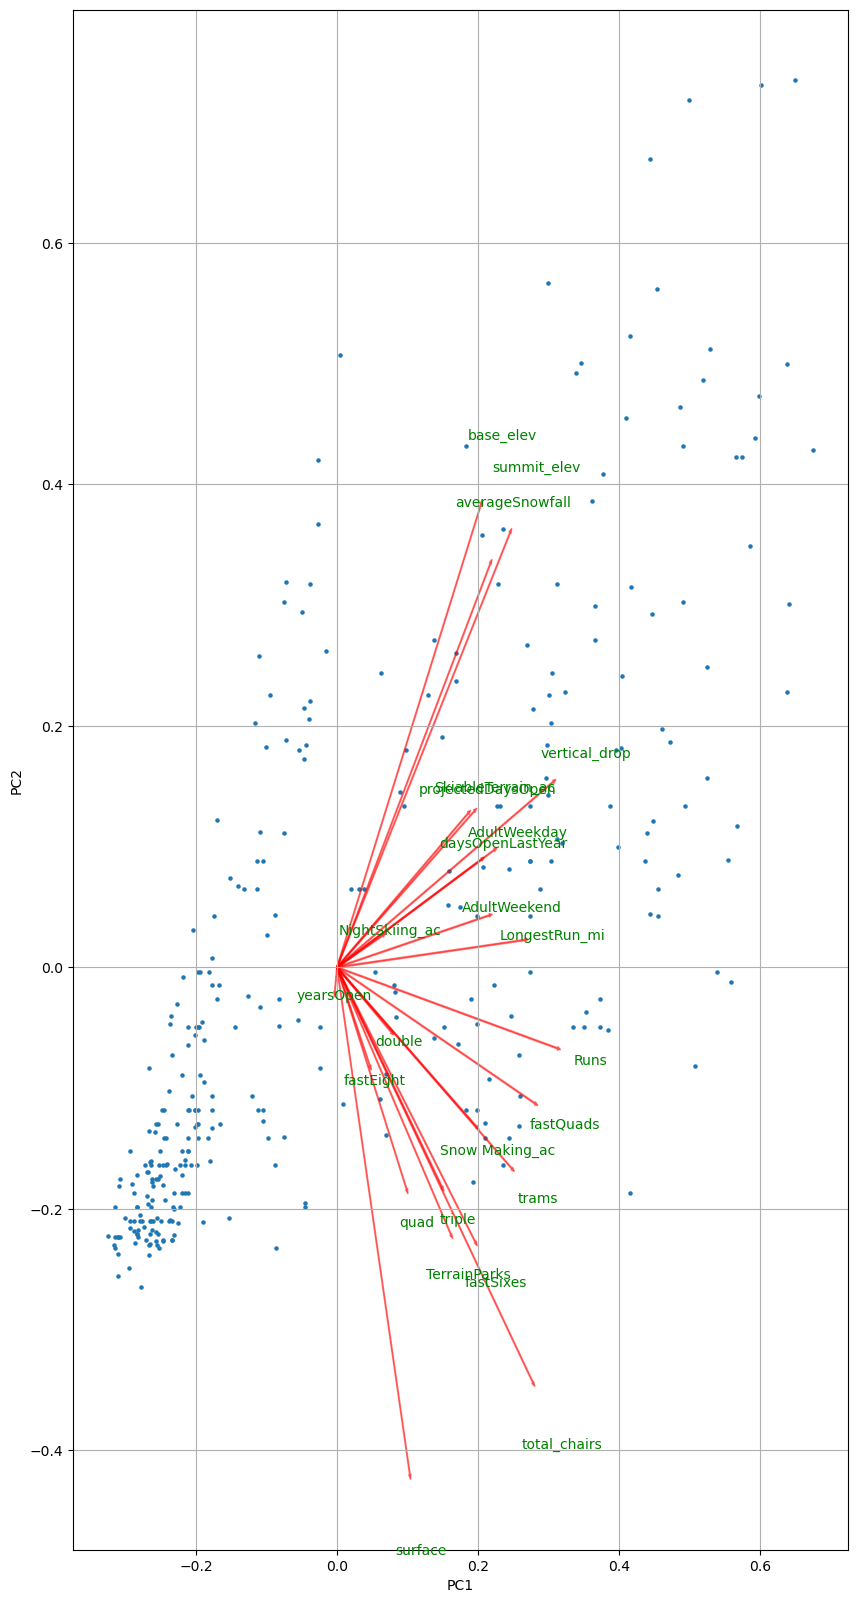

In [174]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig = plt.figure(figsize=(10,20), dpi=100)
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
myplot(np.array(original_numeric_data)[:,0:2],np.transpose(pca.components_[0:2,:]),list(original_numeric_data.columns))

## Find the exact correlation 

between components and features using loading


In [181]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8', 'PC9'], index=original_numeric_only.columns)
loading_matrix


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
summit_elev,0.705267,0.564412,0.257180,-0.074464,0.036174,-0.065200,0.152860,0.059444,-0.157153
vertical_drop,0.881189,0.240923,0.037205,-0.045637,-0.048734,0.085279,-0.055010,0.032701,-0.018284
base_elev,0.586658,0.600939,0.301462,-0.071672,0.060458,-0.108272,0.201991,0.058562,-0.184494
trams,0.712595,-0.261267,0.085074,-0.286294,-0.011012,0.227892,-0.223989,-0.069952,0.122279
fastEight,0.134004,-0.127654,0.144117,0.028987,0.007779,-0.136969,0.101590,0.236435,-0.205009
fastSixes,0.563539,-0.356602,0.306315,-0.127689,0.077360,-0.048685,-0.111198,-0.090813,0.108625
fastQuads,0.806655,-0.176697,0.039735,-0.106237,-0.004902,0.146640,-0.093877,-0.165034,-0.030135
quad,0.283491,-0.288013,-0.598055,-0.147560,0.059241,-0.208966,-0.143331,0.541063,-0.090020
triple,0.428154,-0.285315,-0.103727,-0.149410,-0.077836,-0.225143,0.719184,-0.153823,0.161695
double,0.220615,-0.083930,0.264682,0.742957,-0.468216,0.171788,-0.041410,0.117554,0.042474


In [ ]:
I am not sure if I am reading this write, but 

PC1 : Summit elevation , vertical drop, trams, fast Quads, 
      total_chairs, runs, longestRun_mi 
have a huge effect where the listed values are > 70

PC2 : There are summit_elev, surface where the list values > 55

PC3 : Quad had a hight negative correlation of -59.8